##Importing Libraries and Dataset

In [1]:
!pip install livelossplot

In [2]:
import numpy as np
import pandas as pd
import datetime
import re    # RegEx for removing non-letter characters
import nltk  #natural language processing
from nltk.corpus import stopwords
from nltk.stem.porter import *
from sklearn.preprocessing import StandardScaler
from nltk.stem import WordNetLemmatizer

In [3]:
import nltk
nltk.download("stopwords")
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
data1 = pd.read_csv("ENglish2.csv")
data2 = pd.read_csv("ENglish3.csv")
data3 = pd.read_csv("ENglish4.csv")
data4 = pd.read_csv("ENglish5.csv")
data5 = pd.read_csv("ENglish6.csv")
data6 = pd.read_csv("ENglish7.csv")

In [5]:
data = data1.merge(data2,how='outer')
data = data.merge(data3,how='outer')
data = data.merge(data4,how='outer')
data = data.merge(data5,how='outer')
data = data.merge(data6,how='outer')

In [6]:
data = data.drop('Unnamed: 0',axis=1)
data

,Date,Title,Image
0,6 hours ago,"India VIX Plunges 12%, Adani Enterprises Ralli...",https://i-invdn-com.investing.com/akapi-images...
1,7 hours ago,‘The only sensible investment strategy in this...,https://i-invdn-com.investing.com/akapi-images...
2,9 hours ago,"Asian stocks rise, China rallies on positive P...",https://i-invdn-com.investing.com/news/Shangha...
3,9 hours ago,"Adani Stocks Shine on Nifty, Adani Enterprises...",https://i-invdn-com.investing.com/akapi-images...
4,14 hours ago,Stock Market Update: Sensex Opens 200 pts High...,https://i-invdn-com.investing.com/news/moved_L...
...,...,...,...
10821,"Feb 26, 2021 10:47",Bank Nifty Plunged Today as Bond Yield Rise Ca...,https://i-invdn-com.akamaized.net/akapi-images...
10822,"Feb 26, 2021 10:45",India shares lower at close of trade; Nifty 50...,https://i-invdn-com.akamaized.net/akapi-images...
10823,"Feb 26, 2021 10:42",Indian shares sink ahead of GDP data; financia...,https://i-invdn-com.akamaized.net/akapi-images...
10824,"Feb 26, 2021 07:19",Why Bond Yields Are Causing Global Markets to ...,https://i-invdn-com.akamaized.net/akapi-images...


##Cleaning Dataset and Text Preprocessing

In [7]:
for i in range(10):
    data['Date'][i]='Mar 01, 2023'
for i in np.arange(10,10826,1):
    data['Date'][i]=data['Date'][i][0:-6]
data = data.drop_duplicates(subset=['Title'],keep='first')
data = data.reset_index(drop=True)

In [8]:
for i in range(10547):
    date_time_str = data['Date'][i]
    date_time_obj = datetime.datetime.strptime(date_time_str, '%b %d, %Y')
    data['Date'][i]= date_time_obj.date()

In [9]:
data.to_csv('clean_englsih_news.csv')

In [10]:
df = data[['Date','Title']]
df['Title'] = df['Title'].apply(lambda x: x.lower())
df['Title'] = df['Title'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
df['Title'] = df['Title'] + ' '

<ipython-input-10-d9b7bc445457>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Title'] = df['Title'].apply(lambda x: x.lower())
<ipython-input-10-d9b7bc445457>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Title'] = df['Title'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
<ipython-input-10-d9b7bc445457>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [11]:
df

,Date,Title
0,2023-03-01,india vix plunges 12 adani enterprises rallies...
1,2023-03-01,the only sensible investment strategy in this ...
2,2023-03-01,asian stocks rise china rallies on positive pm...
3,2023-03-01,adani stocks shine on nifty adani enterprises ...
4,2023-03-01,stock market update sensex opens 200 pts highe...
...,...,...
10542,2021-02-26,bank nifty plunged today as bond yield rise ca...
10543,2021-02-26,india shares lower at close of trade nifty 50 ...
10544,2021-02-26,indian shares sink ahead of gdp data financial...
10545,2021-02-26,why bond yields are causing global markets to ...


In [14]:
stock_df = pd.read_csv("NSEI (1).csv")
stock_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-03-01,10479.950195,10525.500000,10447.150391,10458.349609,10458.349609,176000.0
1,2018-03-05,10428.299805,10428.700195,10323.900391,10358.849609,10358.849609,194000.0
2,2018-03-06,10420.500000,10441.349609,10215.900391,10249.250000,10249.250000,222900.0
3,2018-03-07,10232.950195,10243.349609,10141.549805,10154.200195,10154.200195,249500.0
4,2018-03-08,10216.250000,10270.349609,10146.400391,10242.650391,10242.650391,226400.0
...,...,...,...,...,...,...,...
1234,2023-02-27,17428.599609,17451.599609,17299.000000,17392.699219,17392.699219,246400.0
1235,2023-02-28,17383.250000,17440.449219,17255.199219,17303.949219,17303.949219,420900.0
1236,2023-03-01,17360.099609,17467.750000,17345.250000,17450.900391,17450.900391,272900.0
1237,2023-03-02,17421.500000,17445.800781,17306.000000,17321.900391,17321.900391,310700.0


In [15]:
close = stock_df[['Date','Open','Close']]
close = close.iloc[::-1]
close =close.reset_index(drop=True)
close

,Date,Open,Close
0,2023-03-03,17451.250000,17594.349609
1,2023-03-02,17421.500000,17321.900391
2,2023-03-01,17360.099609,17450.900391
3,2023-02-28,17383.250000,17303.949219
4,2023-02-27,17428.599609,17392.699219
...,...,...,...
1234,2018-03-08,10216.250000,10242.650391
1235,2018-03-07,10232.950195,10154.200195
1236,2018-03-06,10420.500000,10249.250000
1237,2018-03-05,10428.299805,10358.849609


In [16]:
close['t3']=np.full((1239),np.nan)
close['t2']=np.full((1239),np.nan)
for i in range(1236):
    close['t3'][1238-i] = close['Open'][1238-i-3] - close['Close'][1238-i]
    close['t2'][1238-i] = close['Open'][1238-i-2] - close['Close'][1238-i]

<ipython-input-16-6734772b288b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close['t3'][1238-i] = close['Open'][1238-i-3] - close['Close'][1238-i]
<ipython-input-16-6734772b288b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close['t2'][1238-i] = close['Open'][1238-i-2] - close['Close'][1238-i]


In [17]:
close

,Date,Open,Close,t3,t2
0,2023-03-03,17451.250000,17594.349609,NaN,NaN
1,2023-03-02,17421.500000,17321.900391,NaN,NaN
2,2023-03-01,17360.099609,17450.900391,NaN,NaN
3,2023-02-28,17383.250000,17303.949219,147.300781,117.550781
4,2023-02-27,17428.599609,17392.699219,28.800781,-32.599610
...,...,...,...,...,...
1234,2018-03-08,10216.250000,10242.650391,146.849609,58.949218
1235,2018-03-07,10232.950195,10154.200195,147.399414,117.099610
1236,2018-03-06,10420.500000,10249.250000,22.049805,-33.000000
1237,2018-03-05,10428.299805,10358.849609,-142.599609,-125.899414


In [18]:
scaler = StandardScaler()
close['t3'] = scaler.fit_transform(np.array(close['t3']).reshape(-1,1))
scaler = StandardScaler()
close['t2'] = scaler.fit_transform(np.array(close['t2']).reshape(-1,1))

In [19]:
close

,Date,Open,Close,t3,t2
0,2023-03-03,17451.250000,17594.349609,NaN,NaN
1,2023-03-02,17421.500000,17321.900391,NaN,NaN
2,2023-03-01,17360.099609,17450.900391,NaN,NaN
3,2023-02-28,17383.250000,17303.949219,0.502615,0.534340
4,2023-02-27,17428.599609,17392.699219,0.002654,-0.308556
...,...,...,...,...,...
1234,2018-03-08,10216.250000,10242.650391,0.500711,0.205370
1235,2018-03-07,10232.950195,10154.200195,0.503031,0.531807
1236,2018-03-06,10420.500000,10249.250000,-0.025829,-0.310804
1237,2018-03-05,10428.299805,10358.849609,-0.720497,-0.832312


In [20]:
df = df.groupby('Date').agg({'Title':'sum'})
df = df.reset_index()
df = df.iloc[::-1]
df = df.reset_index(drop='True')

In [21]:
df['Title'][0]

'india vix plunges 12 adani enterprises rallies 15 leads nifty metal the only sensible investment strategy in this highly uncertain time expert asian stocks rise china rallies on positive pmi data adani stocks shine on nifty adani enterprises leads the pack zooms over 8 stock market update sensex opens 200 pts higher nifty above 17350 adani stocks jump up to 7 nifty sensex likely to open weak sgx nifty indicates lower opening sgx nifty down 34 points asian markets dollar movement fpi flows  more market live sgx nifty flat amid weak global cues brent crude at 83bbl charts indicate bearish trend for nifty metal over nearterm ravi nathani '

In [22]:
close = close.iloc[:501]
close = close.iloc[2:]
close = close.reset_index(drop=True)
close

,Date,Open,Close,t3,t2
0,2023-03-01,17360.099609,17450.900391,NaN,NaN
1,2023-02-28,17383.250000,17303.949219,0.502615,0.534340
2,2023-02-27,17428.599609,17392.699219,0.002654,-0.308556
3,2023-02-24,17591.349609,17465.800781,-0.564820,-0.588966
4,2023-02-23,17574.650391,17511.250000,-0.658900,-0.589526
...,...,...,...,...,...
494,2021-03-04,15026.750000,15080.750000,-0.249015,-0.565103
495,2021-03-03,15064.400391,15245.599609,-1.144724,-1.628051
496,2021-03-02,14865.299805,14919.099609,0.129437,0.478763
497,2021-03-01,14702.500000,14761.549805,1.000041,1.574554


In [23]:
for i in range(499):
    date_time_str = close['Date'][i]
    date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d')
    close['Date'][i]= date_time_obj.date()

<ipython-input-23-d1dc95eee055>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close['Date'][i]= date_time_obj.date()


In [24]:
df=df.merge(close,on='Date',how='inner')
df

,Date,Title,Open,Close,t3,t2
0,2023-03-01,india vix plunges 12 adani enterprises rallies...,17360.099609,17450.900391,NaN,NaN
1,2023-02-28,sensex nifty post eighth straight fall in long...,17383.250000,17303.949219,0.502615,0.534340
2,2023-02-27,stock market update nifty auto index advances...,17428.599609,17392.699219,0.002654,-0.308556
3,2023-02-24,market watch 46 out of 50 nifty constituents d...,17591.349609,17465.800781,-0.564820,-0.588966
4,2023-02-23,sgx nifty rises 52 points wall street shares s...,17574.650391,17511.250000,-0.658900,-0.589526
...,...,...,...,...,...,...
494,2021-03-04,stocks in focus wipro reliance power bharti ai...,15026.750000,15080.750000,-0.249015,-0.565103
495,2021-03-03,buy these two stocks with strong support on ch...,15064.400391,15245.599609,-1.144724,-1.628051
496,2021-03-02,shortterm trend in nifty bearish stay stockspe...,14865.299805,14919.099609,0.129437,0.478763
497,2021-03-01,market live sensex nifty set to open higher fo...,14702.500000,14761.549805,1.000041,1.574554


In [25]:
#Removing links,special character,@usernames and stopwords.
#Also applying lemmatization to the words

pattern = '@\S+|https?:\S+|http?:\S|[^A-Za-z]+|com|net'

stop_words = stopwords.words('english')
lemma = WordNetLemmatizer()

def preprocess(text):
    text = re.sub(pattern, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            tokens.append(lemma.lemmatize(token))
    return ' '.join(tokens)

In [26]:
df.Title = df.Title.apply(lambda x: preprocess(x))
df.head()

,Date,Title,Open,Close,t3,t2
0,2023-03-01,india vix plunge adani enterprise rally lead n...,17360.099609,17450.900391,NaN,NaN
1,2023-02-28,sensex nifty post eighth straight fall longest...,17383.250000,17303.949219,0.502615,0.534340
2,2023-02-27,stock market update nifty auto index advance u...,17428.599609,17392.699219,0.002654,-0.308556
3,2023-02-24,market watch nifty constituent decline investo...,17591.349609,17465.800781,-0.564820,-0.588966
4,2023-02-23,sgx nifty rise point wall street share snap da...,17574.650391,17511.250000,-0.658900,-0.589526


In [27]:
df=df.drop(0,axis=0)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 1 to 498
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    498 non-null    object 
 1   Title   498 non-null    object 
 2   Open    498 non-null    float64
 3   Close   498 non-null    float64
 4   t3      498 non-null    float64
 5   t2      498 non-null    float64
dtypes: float64(4), object(2)
memory usage: 27.2+ KB


##Word Embeddings and Neural Network

In [29]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense,SpatialDropout1D,Dropout
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Bidirectional


In [30]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [31]:
corpus=[]
for i in df.Title:
  new = i.split()
  new = ' '.join(new)
  corpus.append(new)

In [32]:
voc_size=5000

In [33]:
from tensorflow.keras.preprocessing.text import one_hot
One_hot_representation = [one_hot(word,voc_size) for word in corpus]

In [34]:
pad_length = 200
from tensorflow.keras.preprocessing.sequence import pad_sequences
embedded_docs = pad_sequences(One_hot_representation,padding='pre',maxlen=pad_length)

In [35]:
from livelossplot import PlotLossesKeras


###Neural Network with Word embedding

In [41]:
embedded_vector_features = 100
model = Sequential()
model.add(Embedding(voc_size,embedded_vector_features,input_length = pad_length))

In [42]:
model.add(Bidirectional(GRU(100)))
model.add(Dropout(0.1))
model.add(tf.keras.layers.Reshape((1,200), input_shape = (-1 ,200)))
model.add(Bidirectional(LSTM(75)))
model.add(Dropout(0.1))
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.1))

In [43]:
model.add(Dense(1, kernel_initializer='normal', activation='linear'))

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 100)          500000    
                                                                 
 bidirectional_4 (Bidirectio  (None, 200)              121200    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                                 
 reshape_1 (Reshape)         (None, 1, 200)            0         
                                                                 
 bidirectional_5 (Bidirectio  (None, 150)              165600    
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 150)              

## Training and compiling the NN

In [45]:
X_final = np.array(embedded_docs)
y_final_t2 = np.array(df.t2)
y_final_t3 = np.array(df.t3)

####For t2 time window

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X_final, y_final_t2, test_size=0.25, random_state=42)

In [46]:
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.losses import MeanAbsoluteError
msle = MeanSquaredLogarithmicError()
mse = MeanAbsoluteError()
model.compile(
    loss=mse,
    optimizer=Adam(learning_rate=0.01),
    metrics=mse
)

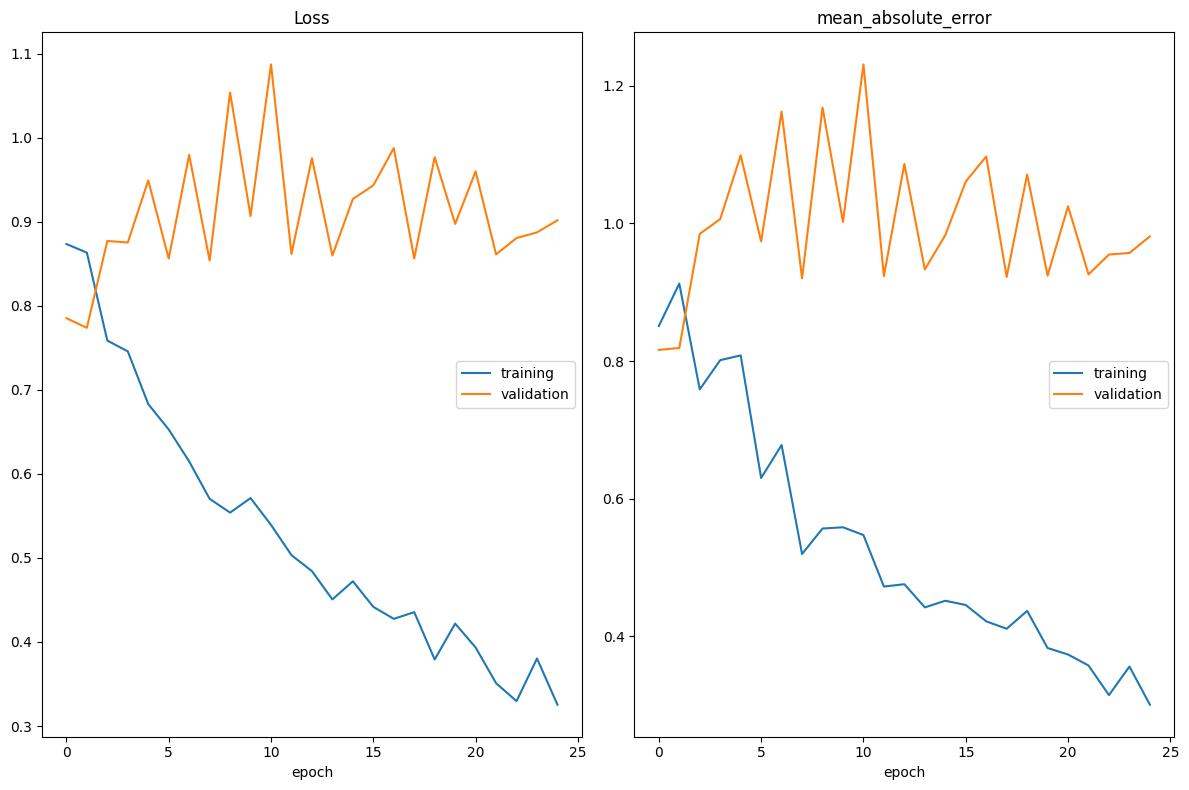

Loss
	training         	 (min:    0.325, max:    0.874, cur:    0.325)
	validation       	 (min:    0.774, max:    1.087, cur:    0.902)
mean_absolute_error
	training         	 (min:    0.300, max:    0.913, cur:    0.300)
	validation       	 (min:    0.816, max:    1.231, cur:    0.981)
8/8 [==============================] - 1s 147ms/step - loss: 0.3254 - mean_absolute_error: 0.3002 - val_loss: 0.9018 - val_mean_absolute_error: 0.9813


In [47]:
model.fit(X_final,y_final_t2,validation_split=0.15,epochs = 25, batch_size = 60,callbacks=[PlotLossesKeras()])

####For t3 time window

In [58]:
model2 = Sequential()
model2.add(Embedding(5000,embedded_vector_features,input_length = pad_length))
model2.add(Bidirectional(GRU(100)))
model2.add(Dropout(0.1))
model2.add(tf.keras.layers.Reshape((1,200), input_shape = (-1 ,200)))
model2.add(Bidirectional(LSTM(75)))
model2.add(Dropout(0.1))
model2.add(Dense(30,activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(1, kernel_initializer='normal', activation='linear'))

In [59]:
model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 200, 100)          500000    
                                                                 
 bidirectional_15 (Bidirecti  (None, 200)              121200    
 onal)                                                           
                                                                 
 dropout_13 (Dropout)        (None, 200)               0         
                                                                 
 reshape_6 (Reshape)         (None, 1, 200)            0         
                                                                 
 bidirectional_16 (Bidirecti  (None, 150)              165600    
 onal)                                                           
                                                                 
 dropout_14 (Dropout)        (None, 150)              

In [60]:
model2.compile(
    loss=mse,
    optimizer=Adam(learning_rate=0.0001),
    metrics=msle
)

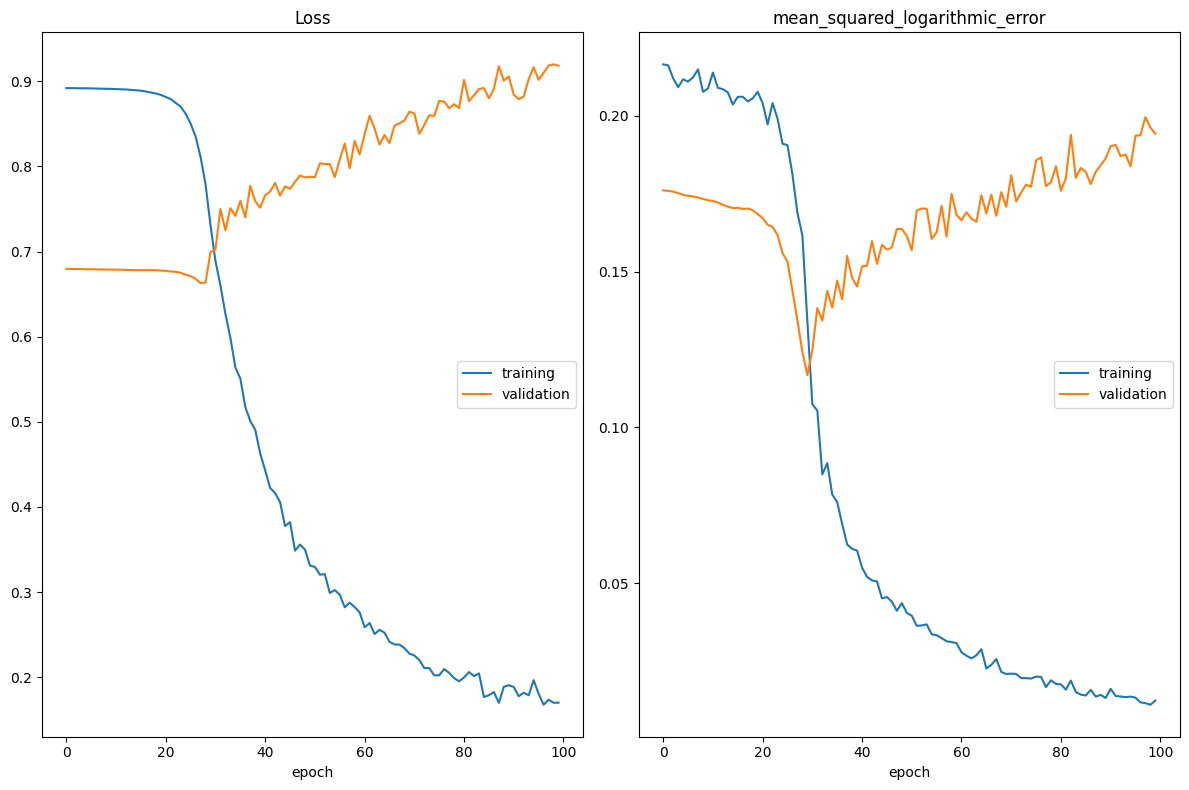

Loss
	training         	 (min:    0.168, max:    0.892, cur:    0.170)
	validation       	 (min:    0.663, max:    0.920, cur:    0.918)
mean_squared_logarithmic_error
	training         	 (min:    0.011, max:    0.216, cur:    0.012)
	validation       	 (min:    0.117, max:    0.200, cur:    0.194)
7/7 [==============================] - 1s 157ms/step - loss: 0.1700 - mean_squared_logarithmic_error: 0.0124 - val_loss: 0.9184 - val_mean_squared_logarithmic_error: 0.1942


In [61]:
model2.fit(X_final,y_final_t3,validation_split=0.2,epochs = 100, batch_size = 60,callbacks=[PlotLossesKeras()])